In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config

In [ ]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [ ]:
import pandas as pd
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/20DLnzChaosLessData/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "MSEs" in file and "bwidx" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses_full = mses_full.rename({"bw":"_bw"}, axis=1)
                mses_full["bw"] = mses_full["_bw"].apply(lambda x: x[0])
                mses = mses_full.drop("_bw", axis=1)[["bw", "mse"]].sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

In [ ]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files(config=config, root_dir=root_dir)
len(bws)

80

Text(0.5, 1.0, 'Minimum MSE is (6309.57344480193, 58)')

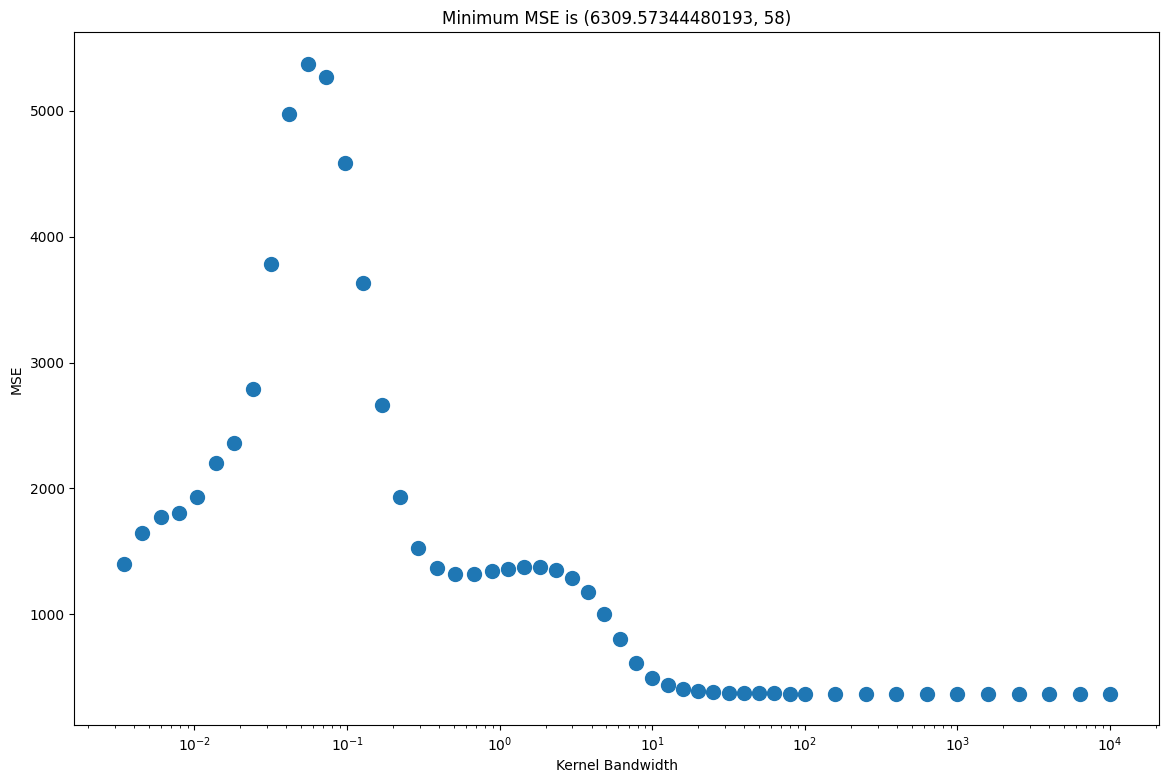

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 0], np.argmin(mses.mse)}")

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_3985/1070983566.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_3985/1070983566.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


15.19743817758293 0.0073079 inf


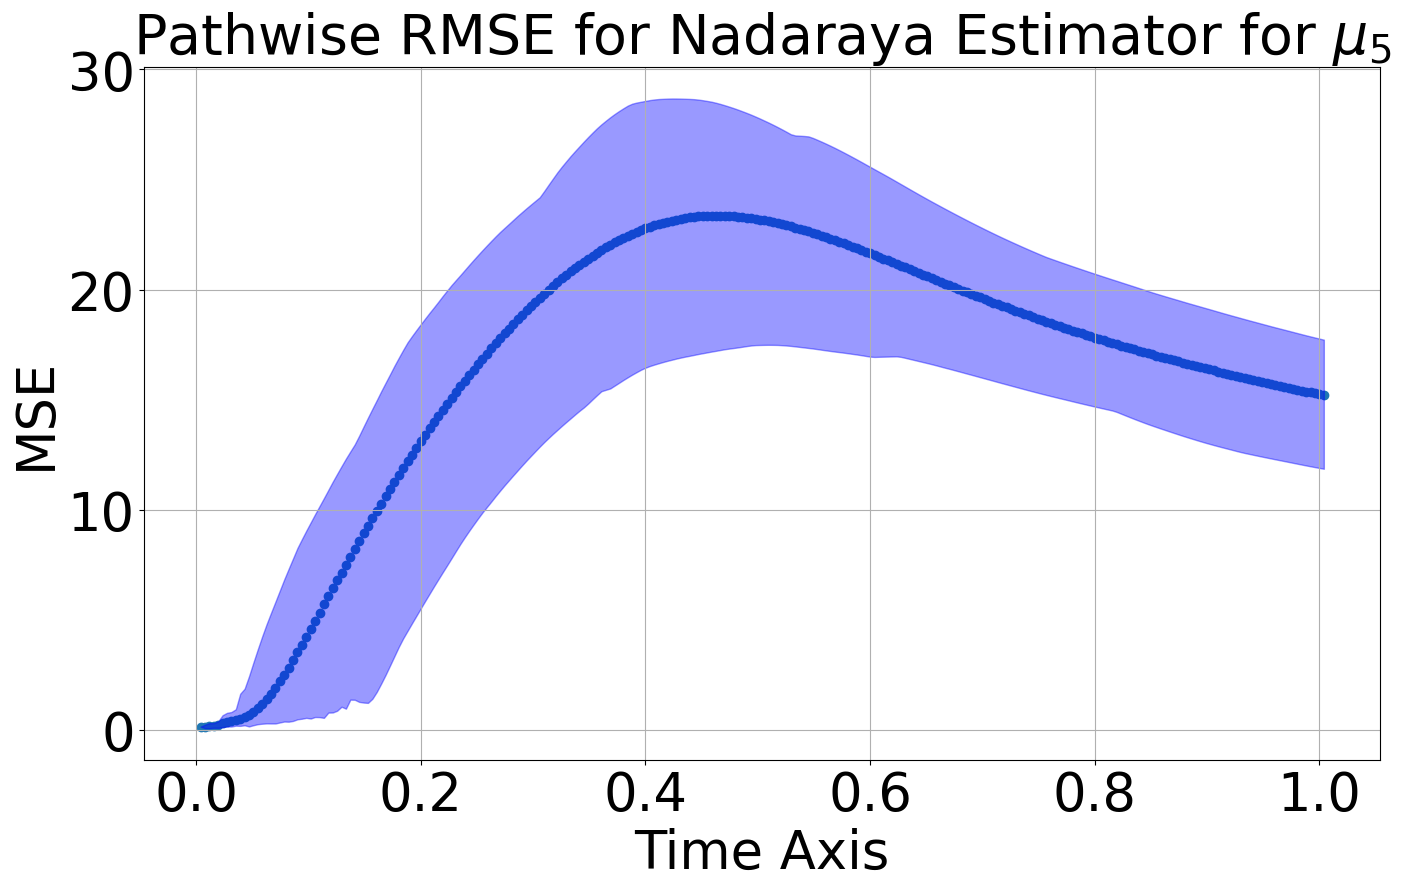

Final time cumulative MSE local-time error 15.19743817758293 with IQR ((11.854213533024224, 17.721834887159602))at bw 0.0073079 for 1.25FConst

15.01192567421635 0.009649 15.19743817758293


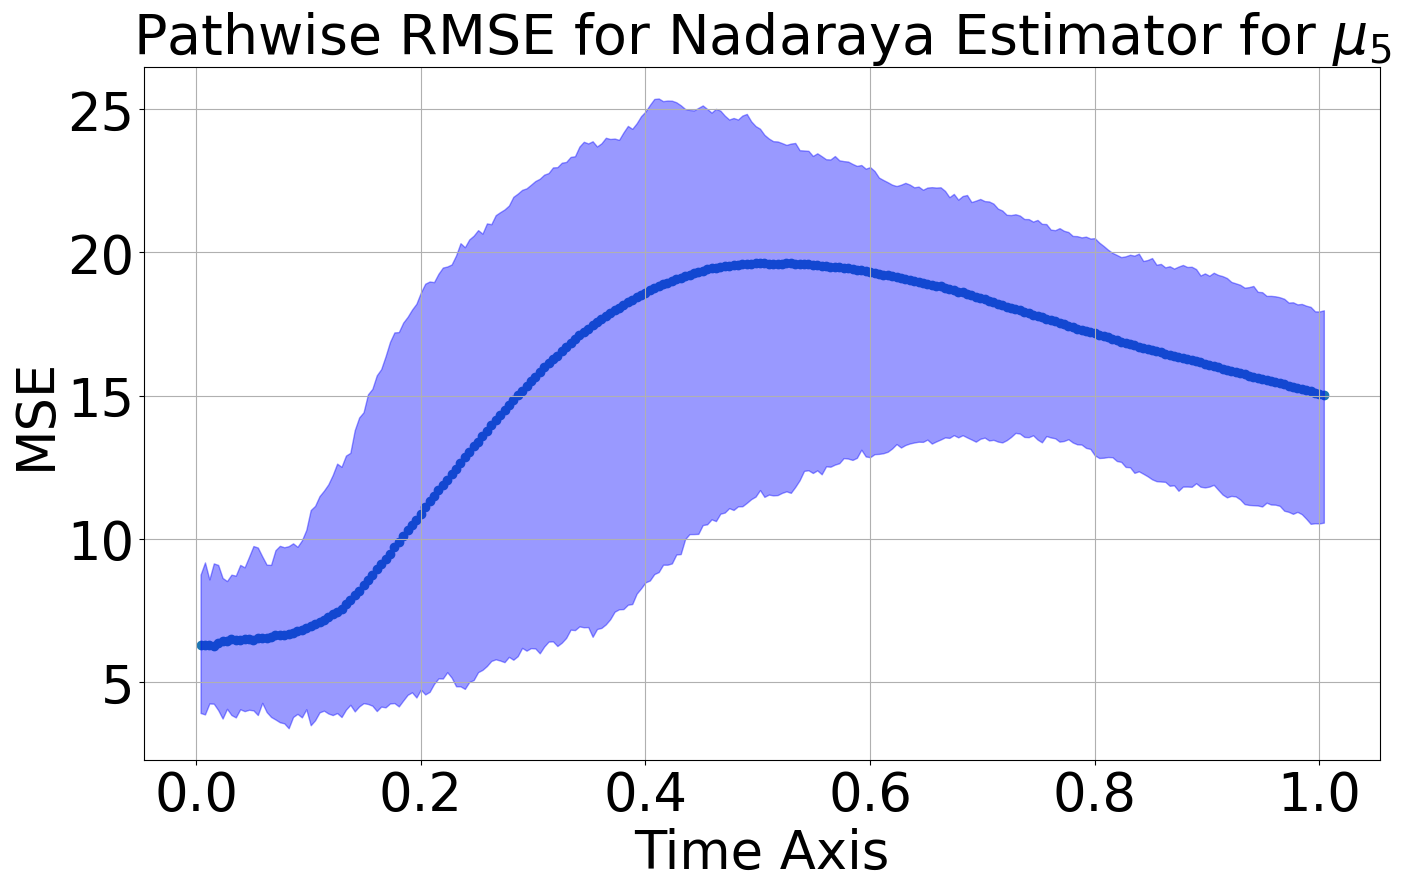

Final time cumulative MSE local-time error 15.01192567421635 with IQR ((10.565666021301183, 17.974975066197786))at bw 0.009649 for 1.25FConst

14.132349027894874 0.0127401 15.01192567421635


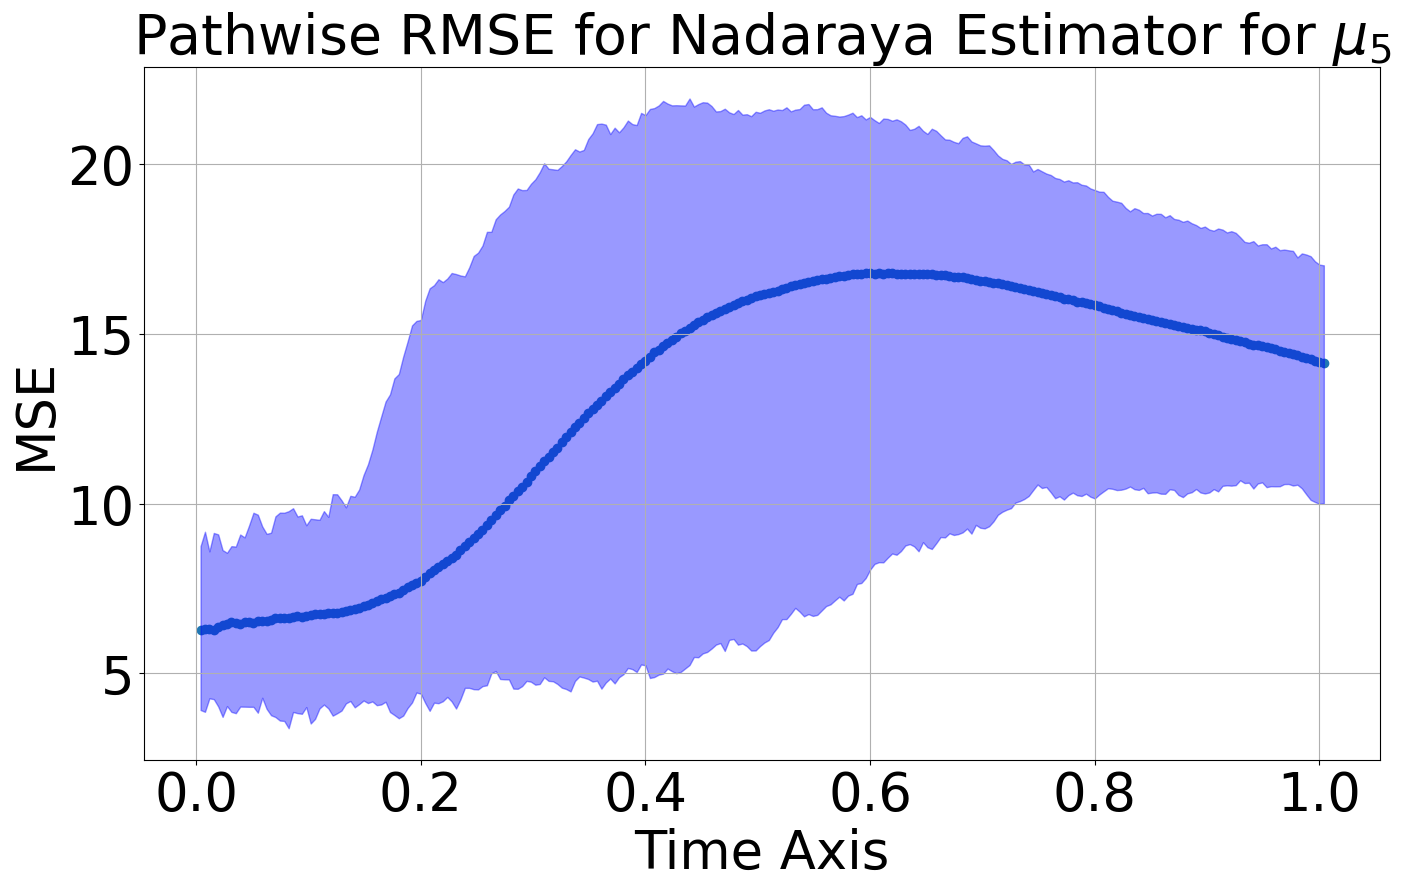

Final time cumulative MSE local-time error 14.132349027894874 with IQR ((10.006435685512058, 17.01102760594438))at bw 0.0127401 for 1.25FConst

11.751452880956942 0.0168214 14.132349027894874


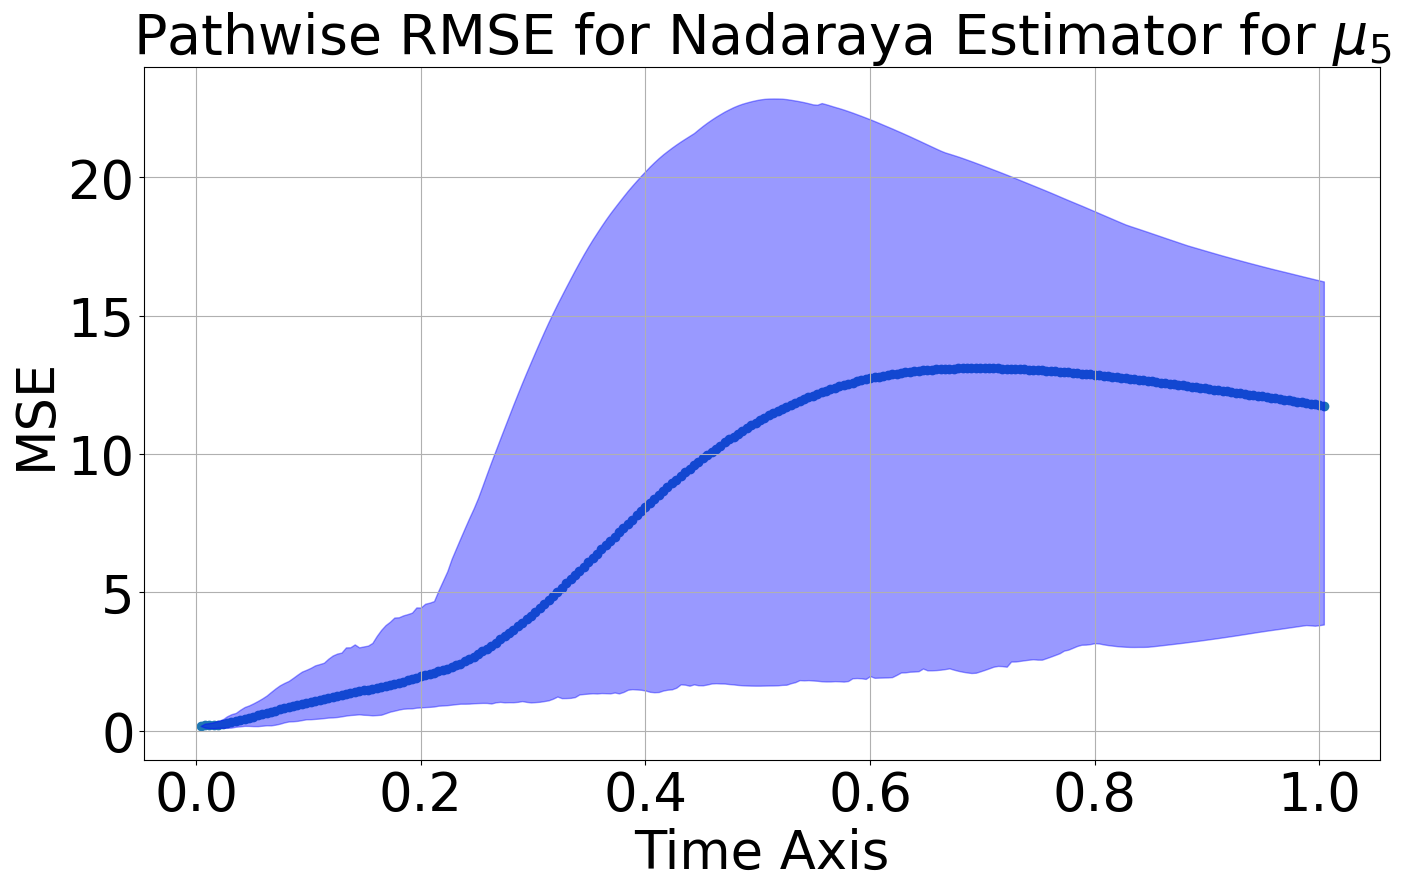

Final time cumulative MSE local-time error 11.751452880956942 with IQR ((3.8377259571002775, 16.235512471663018))at bw 0.0168214 for 1.25FConst

7.672164952590695 0.0222102 11.751452880956942


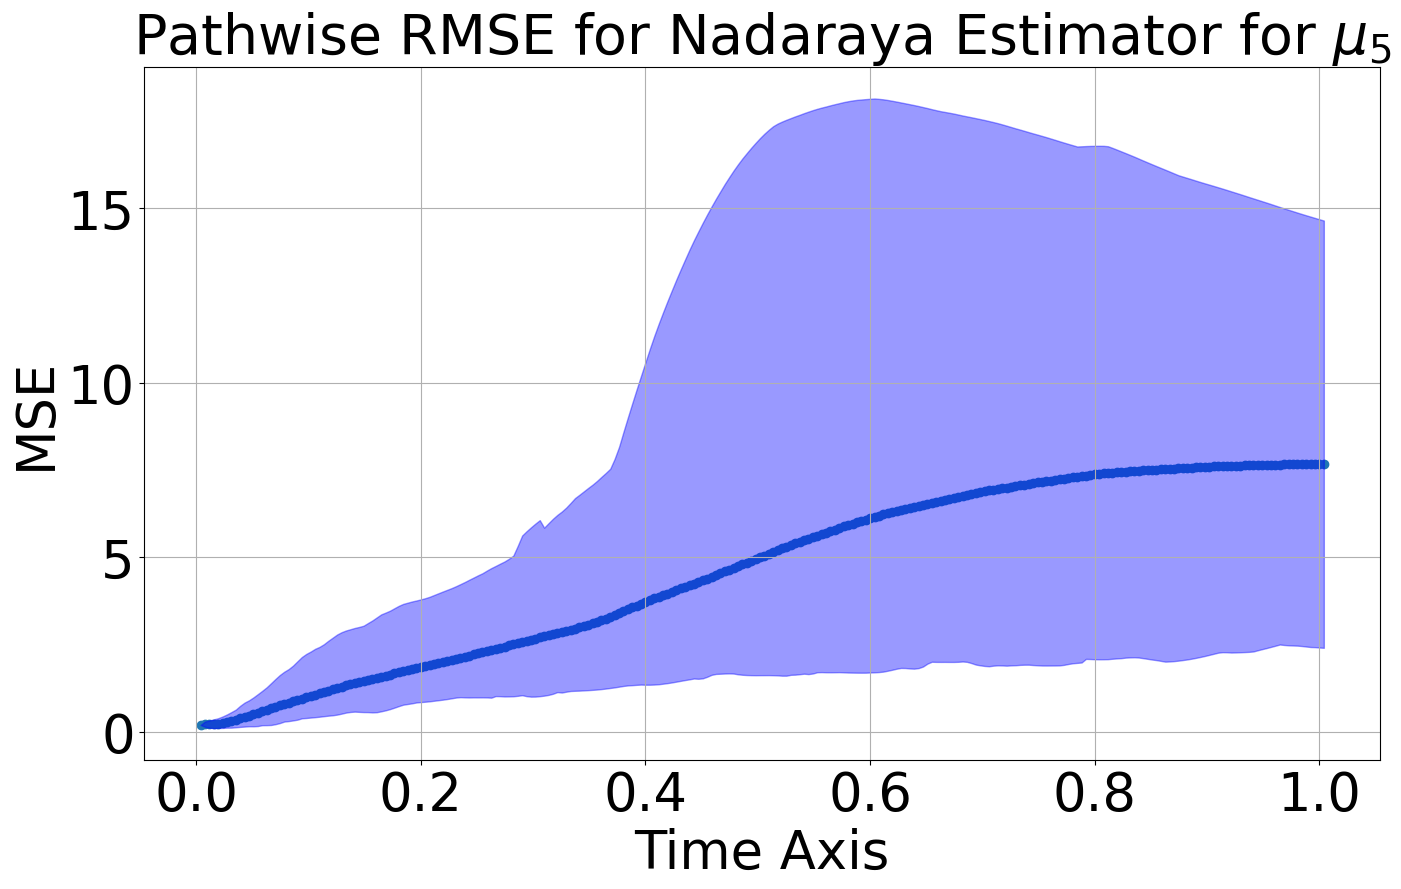

Final time cumulative MSE local-time error 7.672164952590695 with IQR ((2.408641097316109, 14.639237404617612))at bw 0.0222102 for 1.25FConst

5.001064995400341 0.0293252 7.672164952590695


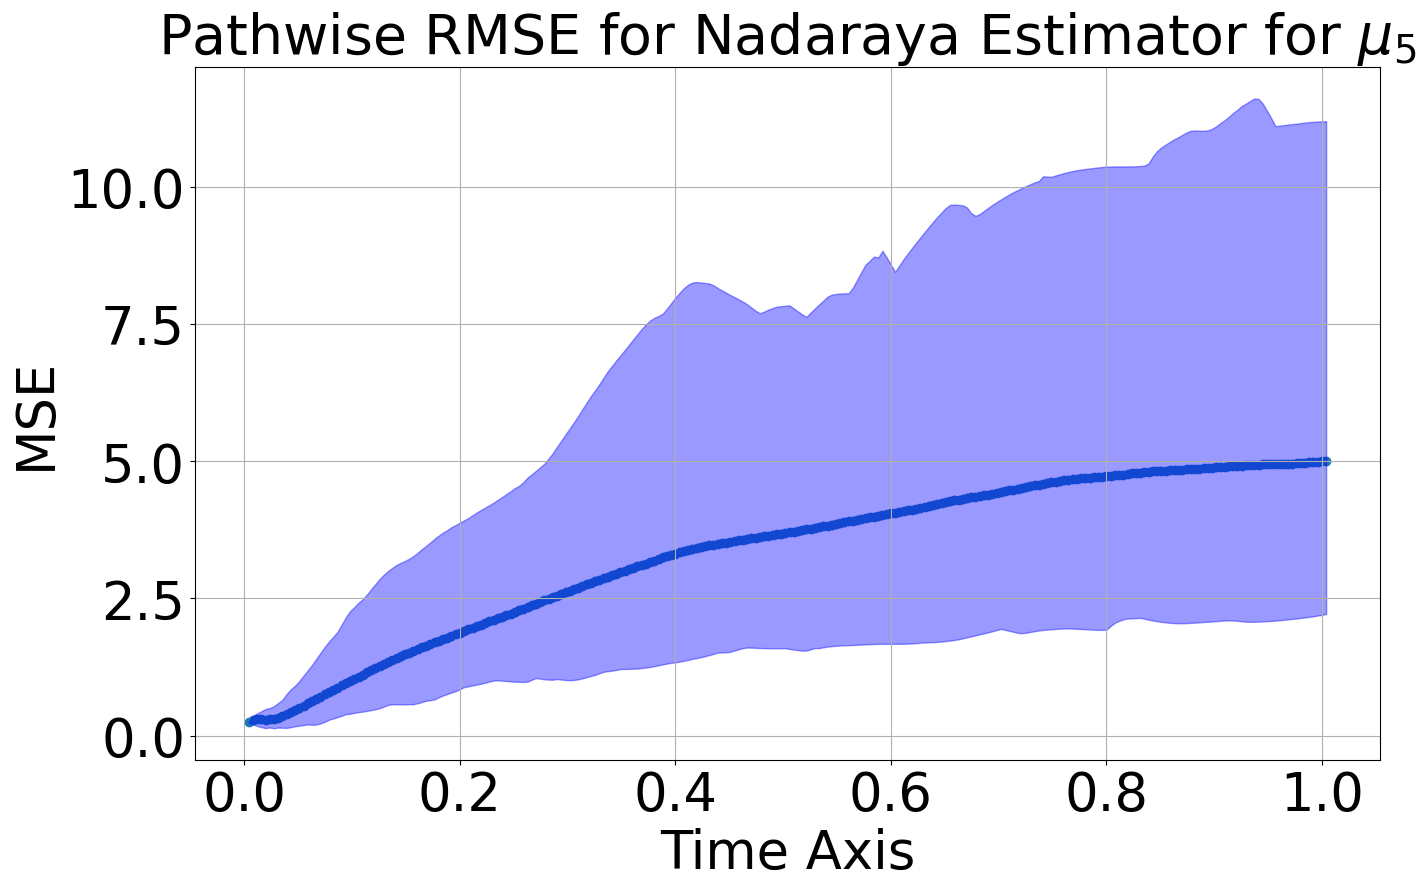

Final time cumulative MSE local-time error 5.001064995400341 with IQR ((2.2172830887947237, 11.190699819593123))at bw 0.0293252 for 1.25FConst

4.61703561752839 0.0387196 5.001064995400341


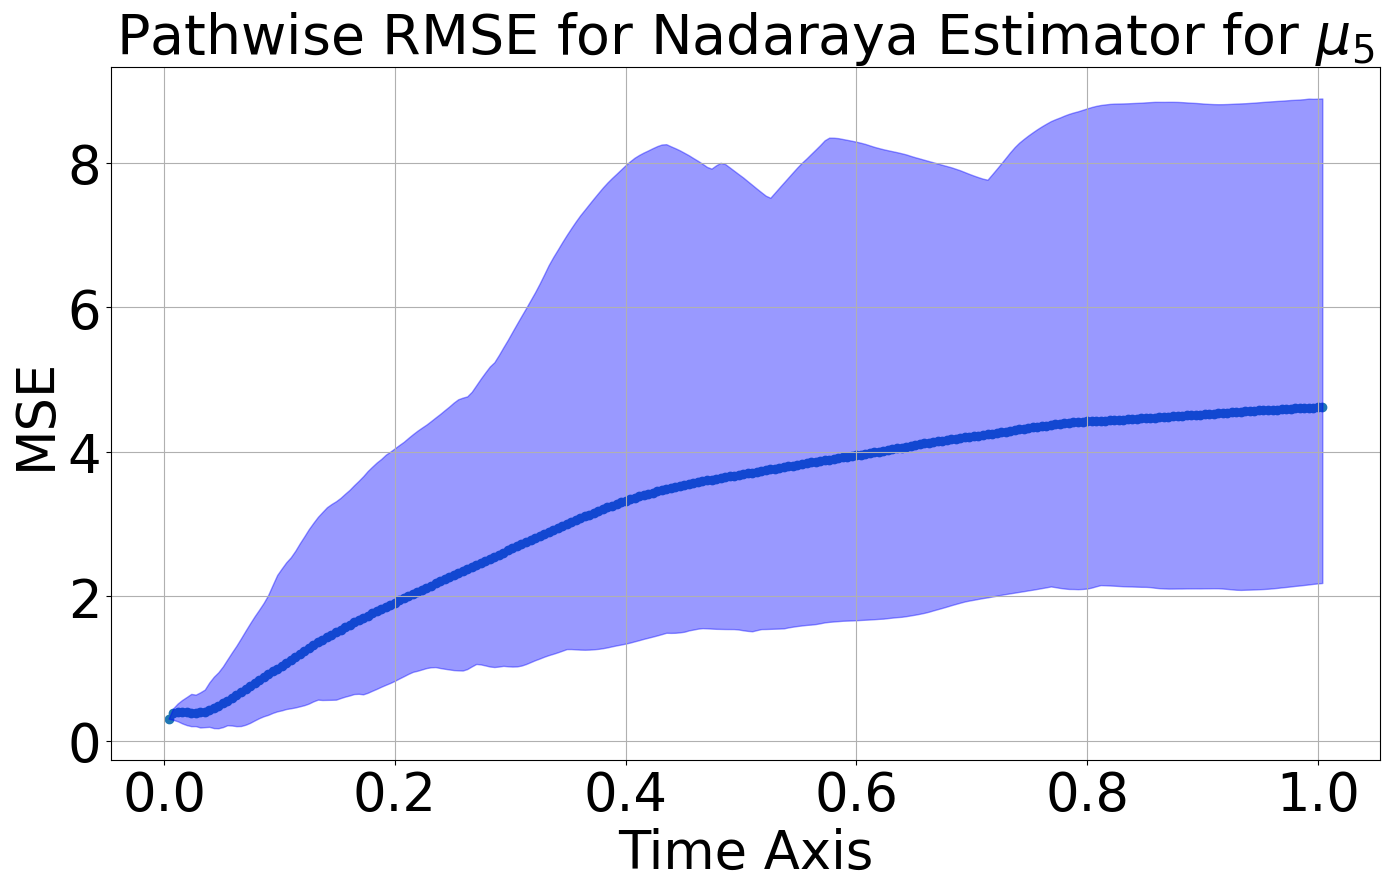

Final time cumulative MSE local-time error 4.61703561752839 with IQR ((2.182464736469033, 8.886502107478055))at bw 0.0387196 for 1.25FConst

4.537301592308156 0.0511235 4.61703561752839


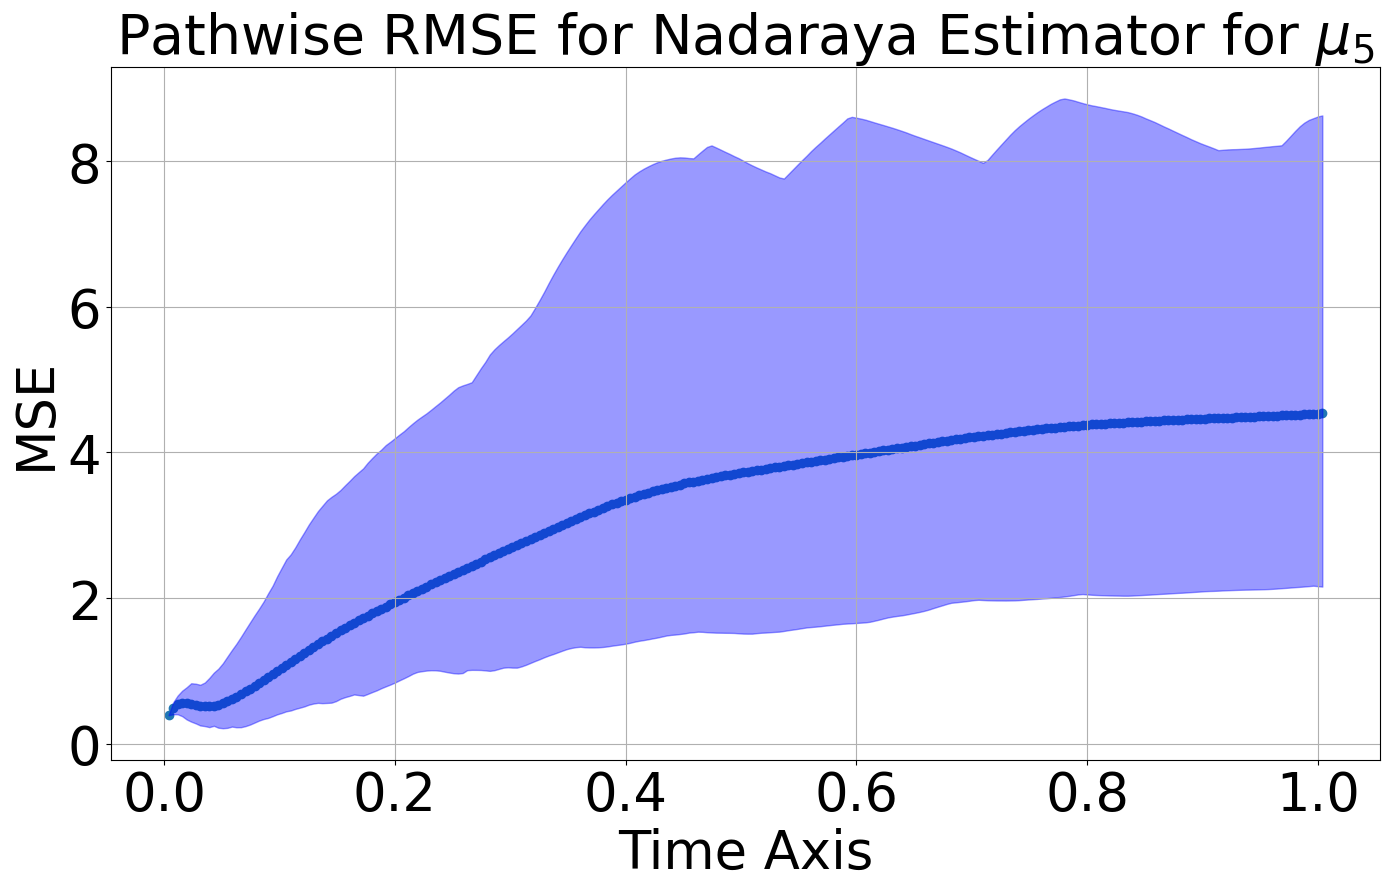

Final time cumulative MSE local-time error 4.537301592308156 with IQR ((2.1569667561614283, 8.630884509468018))at bw 0.0511235 for 1.25FConst

4.517068161680613 0.067501 4.537301592308156


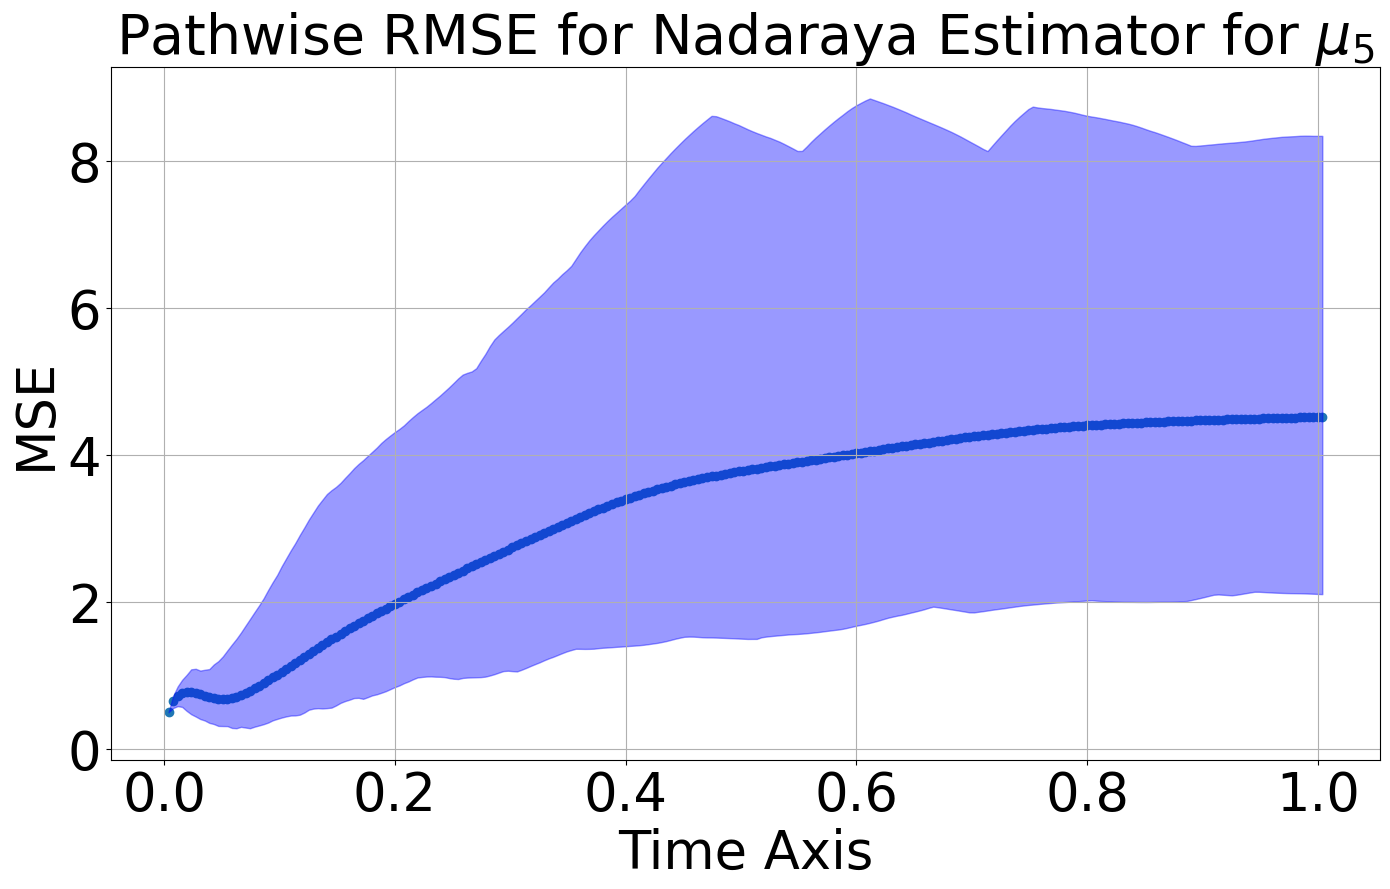

Final time cumulative MSE local-time error 4.517068161680613 with IQR ((2.103913285313942, 8.336987679773014))at bw 0.067501 for 1.25FConst

4.564605408901569 0.0891251 4.517068161680613
7.198547728552057 0.1 4.517068161680613
7.2790889022066345 0.1135011 4.517068161680613
4.692247319701648 0.144544 4.517068161680613
7.339755933125979 0.1840772 4.517068161680613
7.3619185956663795 0.2344229 4.517068161680613
7.367594717145921 0.2985383 4.517068161680613
7.3443032613763615 0.3801894 4.517068161680613
7.282057431723308 0.4841724 4.517068161680613
5.445461221009384 0.616595 4.517068161680613
5.577615111666258 0.7852356 4.517068161680613


In [ ]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/20DLnzChaosLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [ ]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/resource_logging/trained_rec_PM_ST_1000FTh_MLP_2LFac_NSTgtNFMReg_20DLnz_125e+00FConst_VPSDE_T256_Ndiff10000_Tdiff1000e+00_DiffEmbSz64_ResLay10_ResChan8_DiffHdnSz64_TrueHybd_TrueWghts_t00_dT3906e-03_MLP_H4_CUp20_tl110.json.json'